In [83]:
import json
import os
import pickle
import psycopg2
import pandas as pd
import sqlalchemy

import sys
sys.path.append("..")
from connect_db import db_connection

In [84]:
username='ovasarhelyi'

In [85]:
cred_location = '/mnt/data/'+username+'/TPT_tourism/connect_db/data_creds.json.nogit'
db = db_connection.DBConnection(cred_location)

In [69]:
query="""select * from tpt.tuscany_test.location """
location = db.sql_query_to_data_frame(query)

In [71]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import matplotlib.cm as cm
import seaborn as sns
get_ipython().magic(u'matplotlib inline')
%matplotlib inline

In [122]:
# load data 
#regions_github = "/mnt/data/shared/geo-shapes/italy/regions.geojson"
#provinces_github = "/mnt/data/shared/geo-shapes/italy/provinces.geojson"
#municipalities_github = "/mnt/data/shared/geo-shapes/italy/municipalities.geojson"

#load data from TPT 
regions = r"/mnt/data/shared/Boundaries regions and municipalities Italy 2016/Reg2016_WGS84_g/Reg_2016_WGS84_g.shp"
provinces = r"/mnt/data/shared/Boundaries regions and municipalities Italy 2016/CMProv2016_WGS84_g/CMprov2016_WGS84_g.shp"
municipalities = r"/mnt/data/shared/Boundaries regions and municipalities Italy 2016/Com2016_WGS84_g/Com2016_WGS84_g.shp"


In [123]:
df = gpd.read_file(regions)

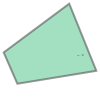

In [138]:
df['geometry'][0].simplify(10)

In [124]:
df.head()

,COD_REG,REGIONE,SHAPE_Leng,SHAPE_Area,geometry
0,1,Piemonte,1.235676e+06,2.539388e+10,"POLYGON ((457749.4633999998 5145501.794600001,..."
1,2,Valle D'Aosta,3.111393e+05,3.258907e+09,"POLYGON ((390652.6434000004 5091766.170499999,..."
2,3,Lombardia,1.410609e+06,2.386215e+10,"(POLYGON ((595652.3579000002 5163515.658, 5960..."
3,5,Veneto,1.058650e+06,1.840575e+10,"POLYGON ((768123.9594999999 5175397.496200001,..."
4,4,Trentino-Alto Adige,8.008937e+05,1.360755e+10,"POLYGON ((743267.7488000002 5219765.7925, 7433..."


In [125]:
df['geometry'] = df['geometry'].to_crs(epsg=4326)

In [126]:
"""df=df.rename(columns=({'geometry':"geometry_text",
                      'REGIONE':'name_region'}))
df[['name_region', 'geometry_text']].to_csv('/mnt/data/shared/region_polygons.csv', sep=';', header=False, index=False)"""

'df=df.rename(columns=({\'geometry\':"geometry_text",\n                      \'REGIONE\':\'name_region\'}))\ndf[[\'name_region\', \'geometry_text\']].to_csv(\'/mnt/data/shared/region_polygons.csv\', sep=\';\', header=False, index=False)'

In [127]:
df2 = gpd.read_file(provinces)

In [128]:
#df2.head()

In [129]:
# Select only Tuscany
df2 = gpd.read_file(provinces)
df_tusc = df2[df2["COD_REG"] == 9]   #tuscany
#df_tusc["color_code"] = df_tusc["COD_PRO"].astype("str")
df_tusc['geometry'] = df_tusc['geometry'].to_crs(epsg=4326)

/home/ovasarhelyi/.conda/envs/velf/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [130]:
"""df_tusc=df_tusc.rename(columns=({'geometry':"geometry_text",
                      'PROVINCIA':'name_province'}))
df_tusc[['name_province', 'geometry_text']].to_csv('/mnt/data/shared/province_polygons.csv', sep=';', header=False, index=False)"""

'df_tusc=df_tusc.rename(columns=({\'geometry\':"geometry_text",\n                      \'PROVINCIA\':\'name_province\'}))\ndf_tusc[[\'name_province\', \'geometry_text\']].to_csv(\'/mnt/data/shared/province_polygons.csv\', sep=\';\', header=False, index=False)'

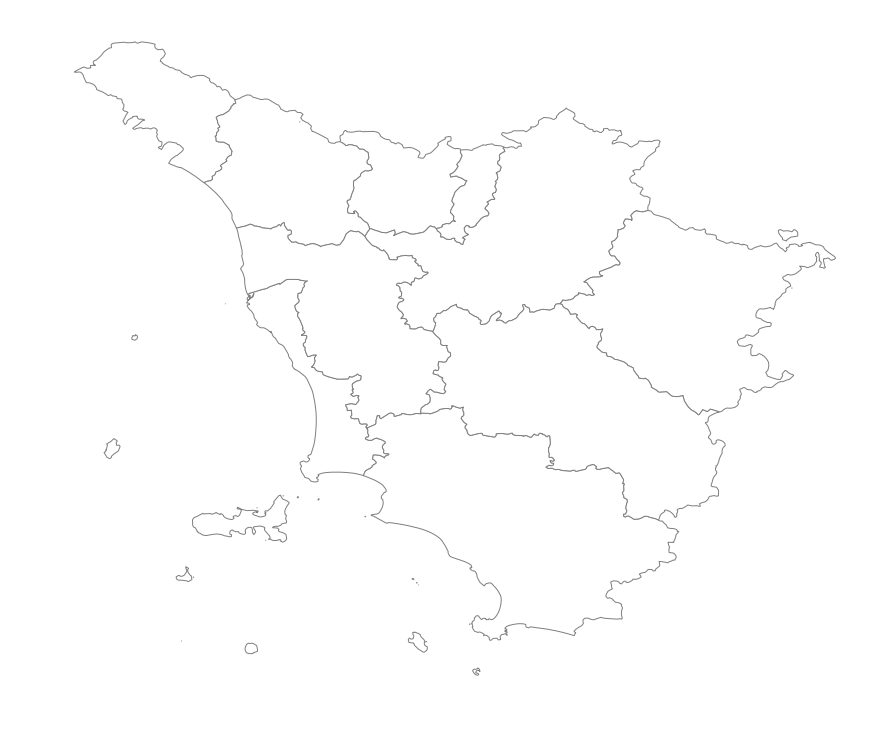

In [131]:
# Plot map
# df_tusc.plot(column="color_code", figsize=(15, 15)) # colorful fun map
#df_tusc.plot(color='white', edgecolor='gray', figsize=(15, 15)) # only borders
# sns.despine()
lats = location['lat']
longs = location['lon']
#plt.plot(longs, lats, 'o', color='lightblue')
df_tusc.plot(color='white', edgecolor='gray', figsize=(15, 15)) # only borders
plt.axis('off')
plt.show()